In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

# Guided example: Stock price modeling

Time series modeling is particularly popular in finance; it's used to model the price movements of almost every asset and commodity. In this checkpoint, you'll use the techniques that you learned in order to model a currency exchange rate. Specifically, you'll model the value of the S&P 500 stock market index.

The data here comes from the [St. Louis Federal Reserve's database](https://fred.stlouisfed.org), which is affectionately known as *FRED*. You'll use the S&P 500 data for now, using nine years of data starting January 1, 2008.

In [2]:
sp_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/SP500_raw.csv')

# Convert exchange rate to a number, with coercion to throw `NA` values if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

# Remove `NA` values
sp_data.dropna(inplace=True)

In [3]:
sp_data.head()

,DATE,SP500,price
0,2008-01-02,1447.16,1447.16
1,2008-01-03,1447.16,1447.16
2,2008-01-04,1411.63,1411.63
3,2008-01-07,1416.18,1416.18
4,2008-01-08,1390.19,1390.19


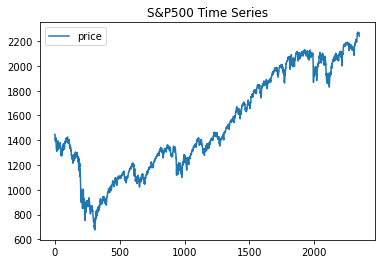

In [4]:
sp_data.plot()
plt.title('S&P500 Time Series')
plt.show()

So, now you have a time series of exchange-rate data. The x-axis in the graph above doesn't make much sense, though. How might you fix that?

You can use pandas to create a date-based index, as demonstrated here:

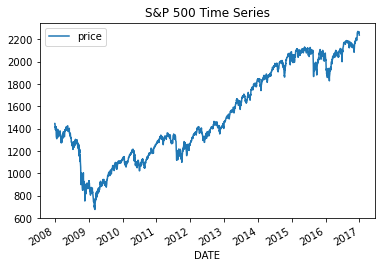

In [5]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

That's better. Now you have a sense of the amount of time that the time series actually covers. As discussed previously, however, you need a stationary dataset. This looks as though it might have a trend to it, so try plotting the difference:

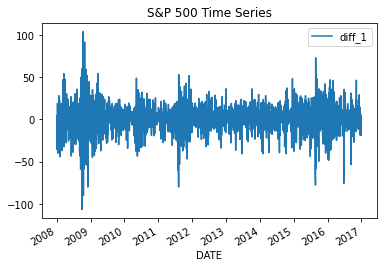

In [6]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

You'll also want to investigate the PACF. Look at the PACF for both the initial and differenced time series:

/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1027: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  FutureWarning,


Text(0.5, 1.0, 'S&P PACF')

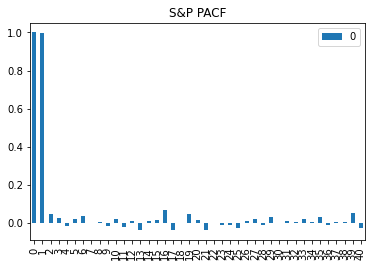

In [7]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("S&P PACF")

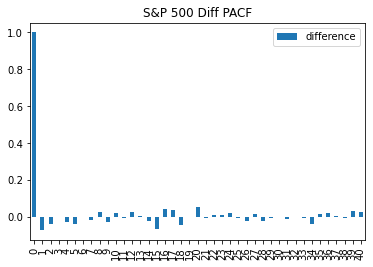

In [8]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("S&P 500 Diff PACF")
plt.legend(['difference'])

## Building models

So your initial time series has one strong autocorrelation, but the differences seem to show no real autocorrelation. Now, build some ARIMA models to experiment, and see how you do!

You're going to build a series of models to evaluate, and each will have slightly different parameters for the ARIMA. Note that the parameters are passed in `(p, d, q)` order, corresponding to the AR, I, and MA portions, respectively.

Recall how those attributes are interpreted. The AR is the past values, I is the level of differencing, and MA is adjusting to past errors.

In [24]:
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(sp_data.price, order=(0,1,0))
model_010_fit = model_010.fit()
print(model_010_fit.summary())
print('Residuals Description')
print(model_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -9602.159
Method:                           css   S.D. of innovations             16.753
Date:                Wed, 25 Nov 2020   AIC                          19208.317
Time:                        10:02:43   BIC                          19219.769
Sample:                             1   HQIC                         19212.496
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3494      0.352      0.993      0.321      -0.340       1.039
Residuals Description
count    2.266000e+03
mean    -2.257682e-16
std      1.675631e+01
min     -1.069694e+02
25%     -7.314369e+00

/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no 

In [23]:
from statsmodels.tsa.arima_model import ARIMA
model_100 = ARIMA(sp_data.price, order=(1,0,0))
model_100_fit = model_100.fit()
print(model_100_fit.summary())
print('Residuals Description')
print(model_100_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 0)   Log Likelihood               -9609.725
Method:                       css-mle   S.D. of innovations             16.753
Date:                Wed, 25 Nov 2020   AIC                          19225.449
Time:                        10:02:14   BIC                          19242.628
Sample:                             0   HQIC                         19231.717
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1698.7593    333.416      5.095      0.000    1045.276    2352.242
ar.L1.price     0.9993      0.001   1569.315      0.000       0.998       1.001
                                    Roots       

/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no 

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model_101 = ARIMA(sp_data.price, order=(1,0,1))
model_101_fit = model_101.fit()
print(model_101_fit.summary())
print('Residuals Description')
print(model_101_fit.resid.describe())

/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no 

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 2267
Model:                     ARMA(1, 1)   Log Likelihood               -9603.247
Method:                       css-mle   S.D. of innovations             16.705
Date:                Wed, 25 Nov 2020   AIC                          19214.494
Time:                        09:42:33   BIC                          19237.399
Sample:                             0   HQIC                         19222.851
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1706.0012    343.887      4.961      0.000    1031.995    2380.007
ar.L1.price     0.9994      0.001   1779.145      0.000       0.998       1.000
ma.L1.price    -0.0787      0.022     -3.614    

In [17]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('Residuals Description')
print(model_111_fit.resid.describe())

/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no 

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9592.974
Method:                       css-mle   S.D. of innovations             16.685
Date:                Wed, 25 Nov 2020   AIC                          19193.947
Time:                        09:46:20   BIC                          19216.850
Sample:                             1   HQIC                         19202.304
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3529      0.289      1.222      0.222      -0.213       0.919
ar.L1.D.price     0.5832      0.155      3.765      0.000       0.280       0.887
ma.L1.D.price    -0.6565      0.144     

/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [22]:
from statsmodels.tsa.arima_model import ARIMA
model_515 = ARIMA(sp_data.price, order=(5,1,5))
model_515_fit = model_515.fit()
print(model_515_fit.summary())
print('Residuals Description')
print(model_515_fit.resid.describe())

/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/owen/bin/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no 

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2266
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9589.997
Method:                       css-mle   S.D. of innovations             16.648
Date:                Wed, 25 Nov 2020   AIC                          19203.993
Time:                        10:00:37   BIC                          19272.703
Sample:                             1   HQIC                         19229.063
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3519      0.288      1.221      0.222      -0.213       0.917
ar.L1.D.price    -0.7921      0.150     -5.295      0.000      -1.085      -0.499
ar.L2.D.price    -0.4329      0.210     

Now, you haven't covered all of the output given by the statsmodels summary function. (If you want to dive deeper, [Machine Learning Mastery's summary](http://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/) is a good place to start.) What you're most interested in here are the p-values of the coefficients, the log-likelihood, and the residuals statistics.

The *p-values* are a way of approximating the likelihood that the coefficient has a significant effect on your outcome. But again, it is formally a probability of more extreme results. It allows you to craft the 95% confidence interval for that coefficient. If `0` is within that interval, then that coefficient is often considered to be potentially unnecessary.

The *log-likelihood* is a log of the likelihood that the given model would generate the data that you see. The closer to `0`, the higher the probability that you can predict the outcome with your given model.

What you can tell from these models, however, is that the outcomes aren't great. There isn't a huge difference in performance across the models, and they all generally seem pretty weak.

## Residuals

The last thing to look at here is the residuals. Basically, *residuals* are what is left over when you build your model; they're the difference between your prediction and the observed quantity. In time series, residuals are typically pretty important. You want your residuals to be random and normally distributed. That's the assumption made about errors in linear modeling.

So how can you validate this?

Below, take a look at your ARIMA(1,1,1) residuals and see.

Text(0.5, 1.0, 'Histogram of Residuals')

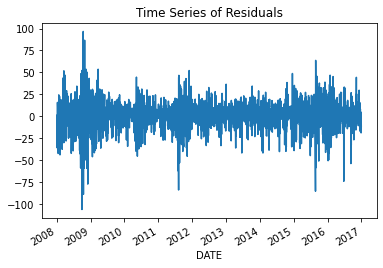

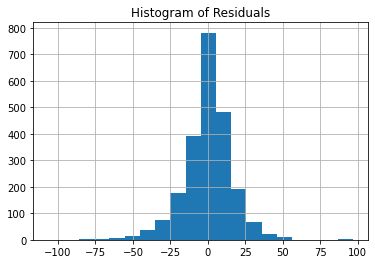

In [18]:
residuals = pd.DataFrame(model_111_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

The MA part indicates that the regression error is actually a linear combination of error terms whose values occurred contemporaneously and at various times in the past.


When you look at these plots of the residuals, you can make two reasonable assumptions. Firstly, there isn't a clear trend in the residuals. There are definitely places of higher volatility, and your model could be expanded to include non-time-series elements that could account for that variation. (Here, that refers to typical regression coefficients, as in the linear modeling sections from earlier, though this would require a dataset that includes such features.) However, there isn't a clear trend to the data indicating an obviously missed seasonality.

Secondly, the residuals seem to approximate a normal distribution. There is a very long tail on the lower end, but that is a very small number of observations that are likely outliers or caused by some external influence.

## Interpreting the ARIMA (1,0,1)

Before you move on to the challenge for this section, return to model interpretation. You've spent this time building models, but you haven't really explored what the output means. Your ARIMA(1,0,1) makes a good example for a quick interpretation.

Firstly, the constant is approximately 1,700. Then, each day is approximately equal to the previous day's value; this is explained through the AR(1) coefficient being `0.9994`. The moving average term is approximately `-0.0787`; this means that by incorporating the moving average term in the model, the error present in the model will be reduced by about 8% per day. The moving average part indicates that the regression error is actually a linear combination of error terms whose values occurred both in the current time lag and at various times in the past.

Can you interpret the output of one of the other models? What about ARIMA(1,1,1)? Which do you prefer? Then try some of your own coefficients below.

### ARIMA (1,1,1) evaluation
The constant coefficient is about 0.35. Here it is insignificant.

The AR(1) coefficent is 0.58 showing that the difference of the preceeding day is only moderately correlated with the difference of the next day. 

The MA(1) coefficent is -0.66 which here indicates that the error present in the model will reduce about 66% each day.

## Comparing models with AIC

Now, you've generated a series of models. Which one works best?

Well, one of the easiest ways to compare time series models is with something called the *Akaike information criterion* (AIC). The AIC is a measure of the degree of information contained in the model, as you may recall from the discussion of information theory from when you learned about decision trees.

Conveniently, statsmodels [calculates the AIC](https://www.otexts.org/fpp/8/6) automatically. You want to minimize the value of the AIC; the model with the lowest AIC is likely the best model to choose. Just how *much* better is calculated using the ratios of AICs.

Once you've identified the model with the lowest AIC, you'll compare that model to other models using the probability of information loss. You can find the probability that another model minimizes information loss using the following calculation:

$$ exp((AIC_{min} - AIC_{x})/2) $$

This gives the probability of having lost less information with the other model.

From the examples, ARIMA(1,1,1) has an AIC of 19,193. Your worst model has an AIC of 19,225. (It's the ARIMA(1,0,0), or AR(1) model.) But how do these two models compare?

It turns out, when doing the above calculation, you get a probability of 1.125e-7 that you lost less information in the AR(1) model. That is a big difference and suggests that ARIMA(1,1,1) is a much better model.

Below, compare the other models to ARIMA(1,1,1).

In [26]:
## Comparision to (1,0,0)
np.exp((model_111_fit.aic - model_100_fit.aic)/2)

1.4435078084207816e-07

In [27]:
## Comparision to (0,1,0)
np.exp((model_111_fit.aic - model_010_fit.aic)/2)

0.0007578346712186211

In [28]:
## Comparision to (1,0,1)
np.exp((model_111_fit.aic - model_101_fit.aic)/2)

3.454587459731243e-05

In [29]:
## Comparision to (1,0,1)
np.exp((model_111_fit.aic - model_515_fit.aic)/2)

0.006584709030965296